# Decision Trees Analysis

This notebook demonstrates the application of Decision Trees for both classification and regression tasks. Decision trees are versatile machine learning algorithms that can model non-linear relationships in data by recursively partitioning the feature space.


## 1. Introduction to Decision Trees <a name="introduction"></a>

Decision trees are supervised learning algorithms used for both classification and regression tasks. They work by creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Key characteristics of decision trees:

- **Interpretability**: Decision trees can be visualized and easily interpreted, unlike many "black box" machine learning models.
- **Non-parametric**: They make no assumptions about the distribution of data or the functional form of the relationship.
- **Handle both numerical and categorical data**: Can work with various data types without extensive preprocessing.
- **Handle non-linear relationships**: Can model complex patterns by breaking the problem into smaller, simpler decisions.
- **Risk of overfitting**: Without proper pruning or depth control, they tend to overfit to training data.

Let's first import the necessary libraries:

In [ ]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling - fixed for newer matplotlib versions
try:
    plt.style.use('seaborn-v0_8-whitegrid')  # New style name
except OSError:
    plt.style.use('default')  # Fallback to default
    
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

# Import sklearn modules
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error

# For saving models
import pickle
import os

# For reproducibility
np.random.seed(42)

✅ Libraries imported successfully!
Matplotlib version: 3.9.4
Seaborn version: 0.13.2


## 2. Classification with Decision Trees <a name="classification"></a>

### 2.1 Breast Cancer Dataset <a name="breast-cancer"></a>

We'll start by exploring the Breast Cancer Wisconsin dataset, which is a classic binary classification problem.

In [3]:
# Load breast cancer dataset
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

# Display dataset description
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# Examine the data structure
X_full = data_breast_cancer.data
y = data_breast_cancer.target

# Display the first few rows of the data
print(f"Data shape: {X_full.shape}")
print(f"Target distribution: \n{pd.Series(y).value_counts()}")
print(f"\nTarget names: {data_breast_cancer.target_names}")
X_full.head()

Data shape: (569, 30)
Target distribution: 
target
1    357
0    212
Name: count, dtype: int64

Target names: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


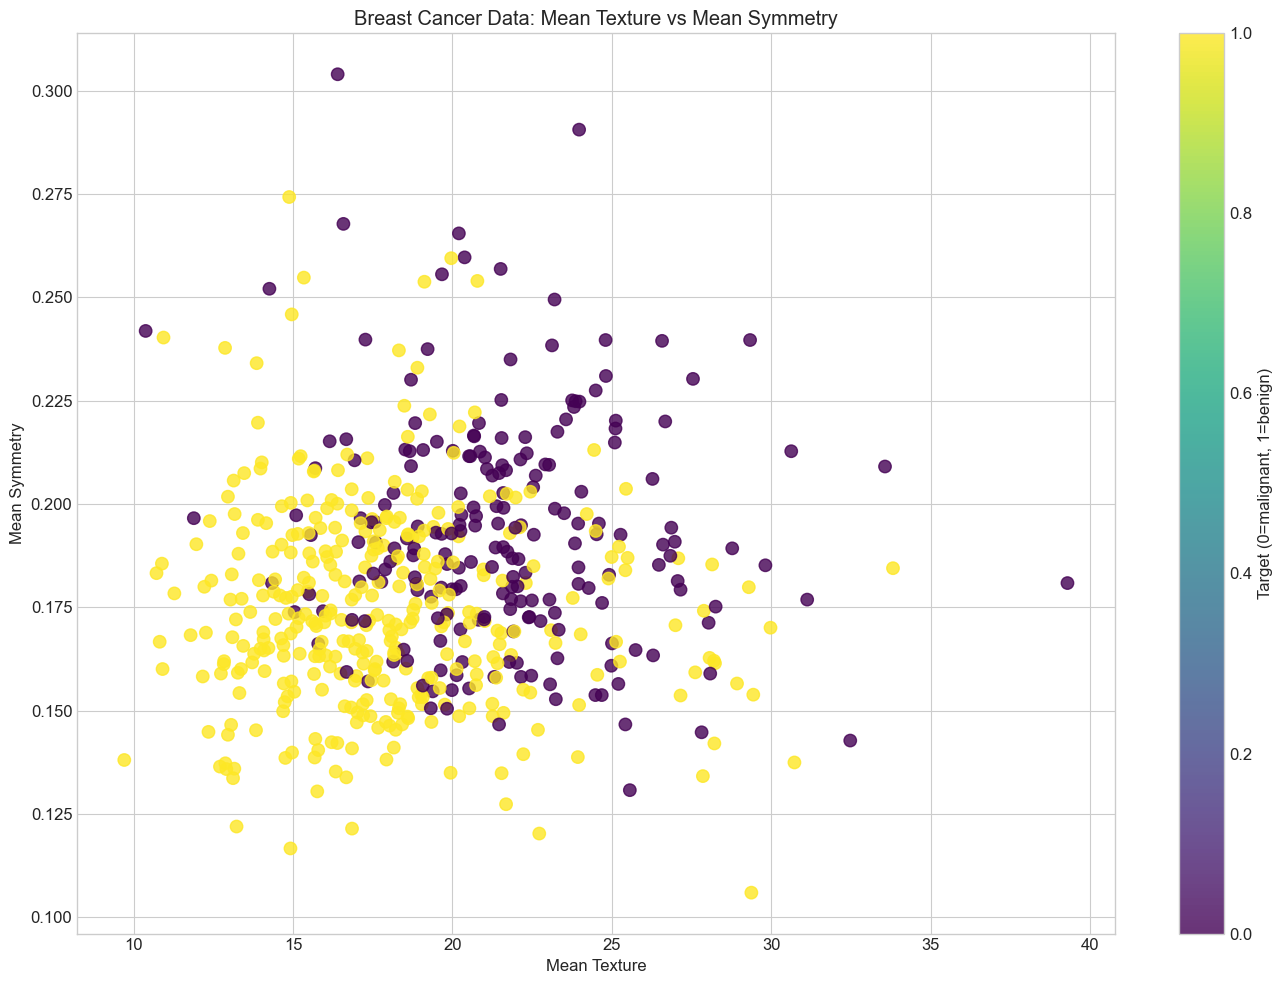

In [5]:
# Let's visualize the relationship between some features
plt.figure(figsize=(14, 10))

# Create scatter plot with colors representing the target class
scatter = plt.scatter(
    X_full['mean texture'], 
    X_full['mean symmetry'], 
    c=y, 
    cmap='viridis', 
    alpha=0.8, 
    s=80
)

# Add legend
plt.colorbar(scatter, label='Target (0=malignant, 1=benign)')
plt.title('Breast Cancer Data: Mean Texture vs Mean Symmetry')
plt.xlabel('Mean Texture')
plt.ylabel('Mean Symmetry')
plt.tight_layout()
plt.show()

For simplicity in visualization, we'll use two features (mean texture and mean symmetry) for our classification task. In a real-world scenario, you would typically use more features to capture more complex patterns.

In [6]:
# Select features for simplicity
X = X_full[['mean texture', 'mean symmetry']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.2 Model Depth Evaluation <a name="depth-evaluation"></a>

A critical hyperparameter for decision trees is the maximum depth. Let's evaluate how different depths affect model performance to find the optimal balance between underfitting and overfitting.

In [7]:
# Initialize lists to store metrics
depths = range(1, 15)  # Expanded range
results = []

# Evaluate model performance at different depths
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Compute performance metrics
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    results.append([depth, train_f1, test_f1, train_accuracy, test_accuracy])
    
# Convert results to DataFrame for easier handling
results_df = pd.DataFrame(
    results, 
    columns=['Depth', 'Train F1', 'Test F1', 'Train Accuracy', 'Test Accuracy']
)

# Display the results
results_df

,Depth,Train F1,Test F1,Train Accuracy,Test Accuracy
0,1,0.753906,0.694915,0.723077,0.684211
1,2,0.821124,0.788732,0.769231,0.736842
2,3,0.821124,0.788732,0.769231,0.736842
3,4,0.846416,0.764706,0.802198,0.719298
4,5,0.871022,0.739726,0.830769,0.666667
5,6,0.896552,0.731034,0.868132,0.657895
6,7,0.921502,0.717241,0.898901,0.640351
7,8,0.941379,0.724638,0.925275,0.666667
8,9,0.959860,0.696296,0.949451,0.640351
9,10,0.984127,0.681481,0.980220,0.622807


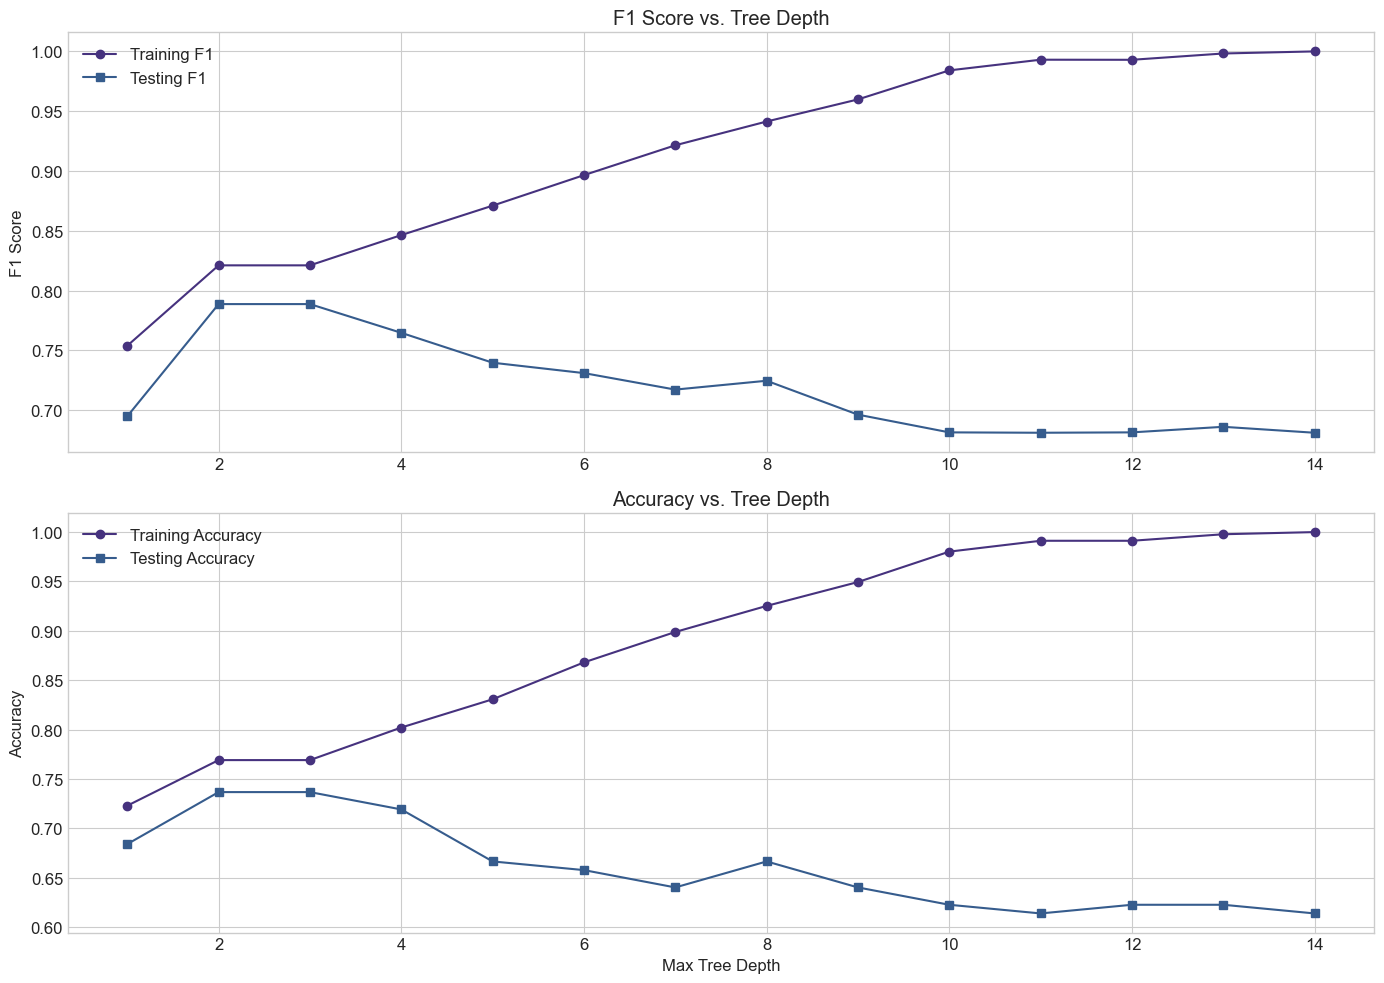

In [8]:
# Visualize performance metrics vs. tree depth
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(results_df['Depth'], results_df['Train F1'], marker='o', label='Training F1')
plt.plot(results_df['Depth'], results_df['Test F1'], marker='s', label='Testing F1')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Tree Depth')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(results_df['Depth'], results_df['Train Accuracy'], marker='o', label='Training Accuracy')
plt.plot(results_df['Depth'], results_df['Test Accuracy'], marker='s', label='Testing Accuracy')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Find the optimal depth based on test F1 score
best_depth_idx = results_df['Test F1'].idxmax()
best_depth = results_df.loc[best_depth_idx, 'Depth']
best_metrics = results_df.loc[best_depth_idx]

print(f"Optimal tree depth: {int(best_depth)}")
print(f"Best test F1 score: {best_metrics['Test F1']:.4f}")
print(f"Best test accuracy: {best_metrics['Test Accuracy']:.4f}")

# Save the best results for later use
best_results = results_df.loc[best_depth_idx].tolist()

# Ensure the data directory exists
os.makedirs('../data', exist_ok=True)

# Save the best results to a pickle file
with open('./data/f1acc_tree.pkl', 'wb') as file:
    pickle.dump(best_results, file)

Optimal tree depth: 2
Best test F1 score: 0.7887
Best test accuracy: 0.7368


### 2.3 Tree Visualization <a name="tree-visualization"></a>

One of the key advantages of decision trees is their interpretability. Let's train a model with the optimal depth and visualize the resulting tree.

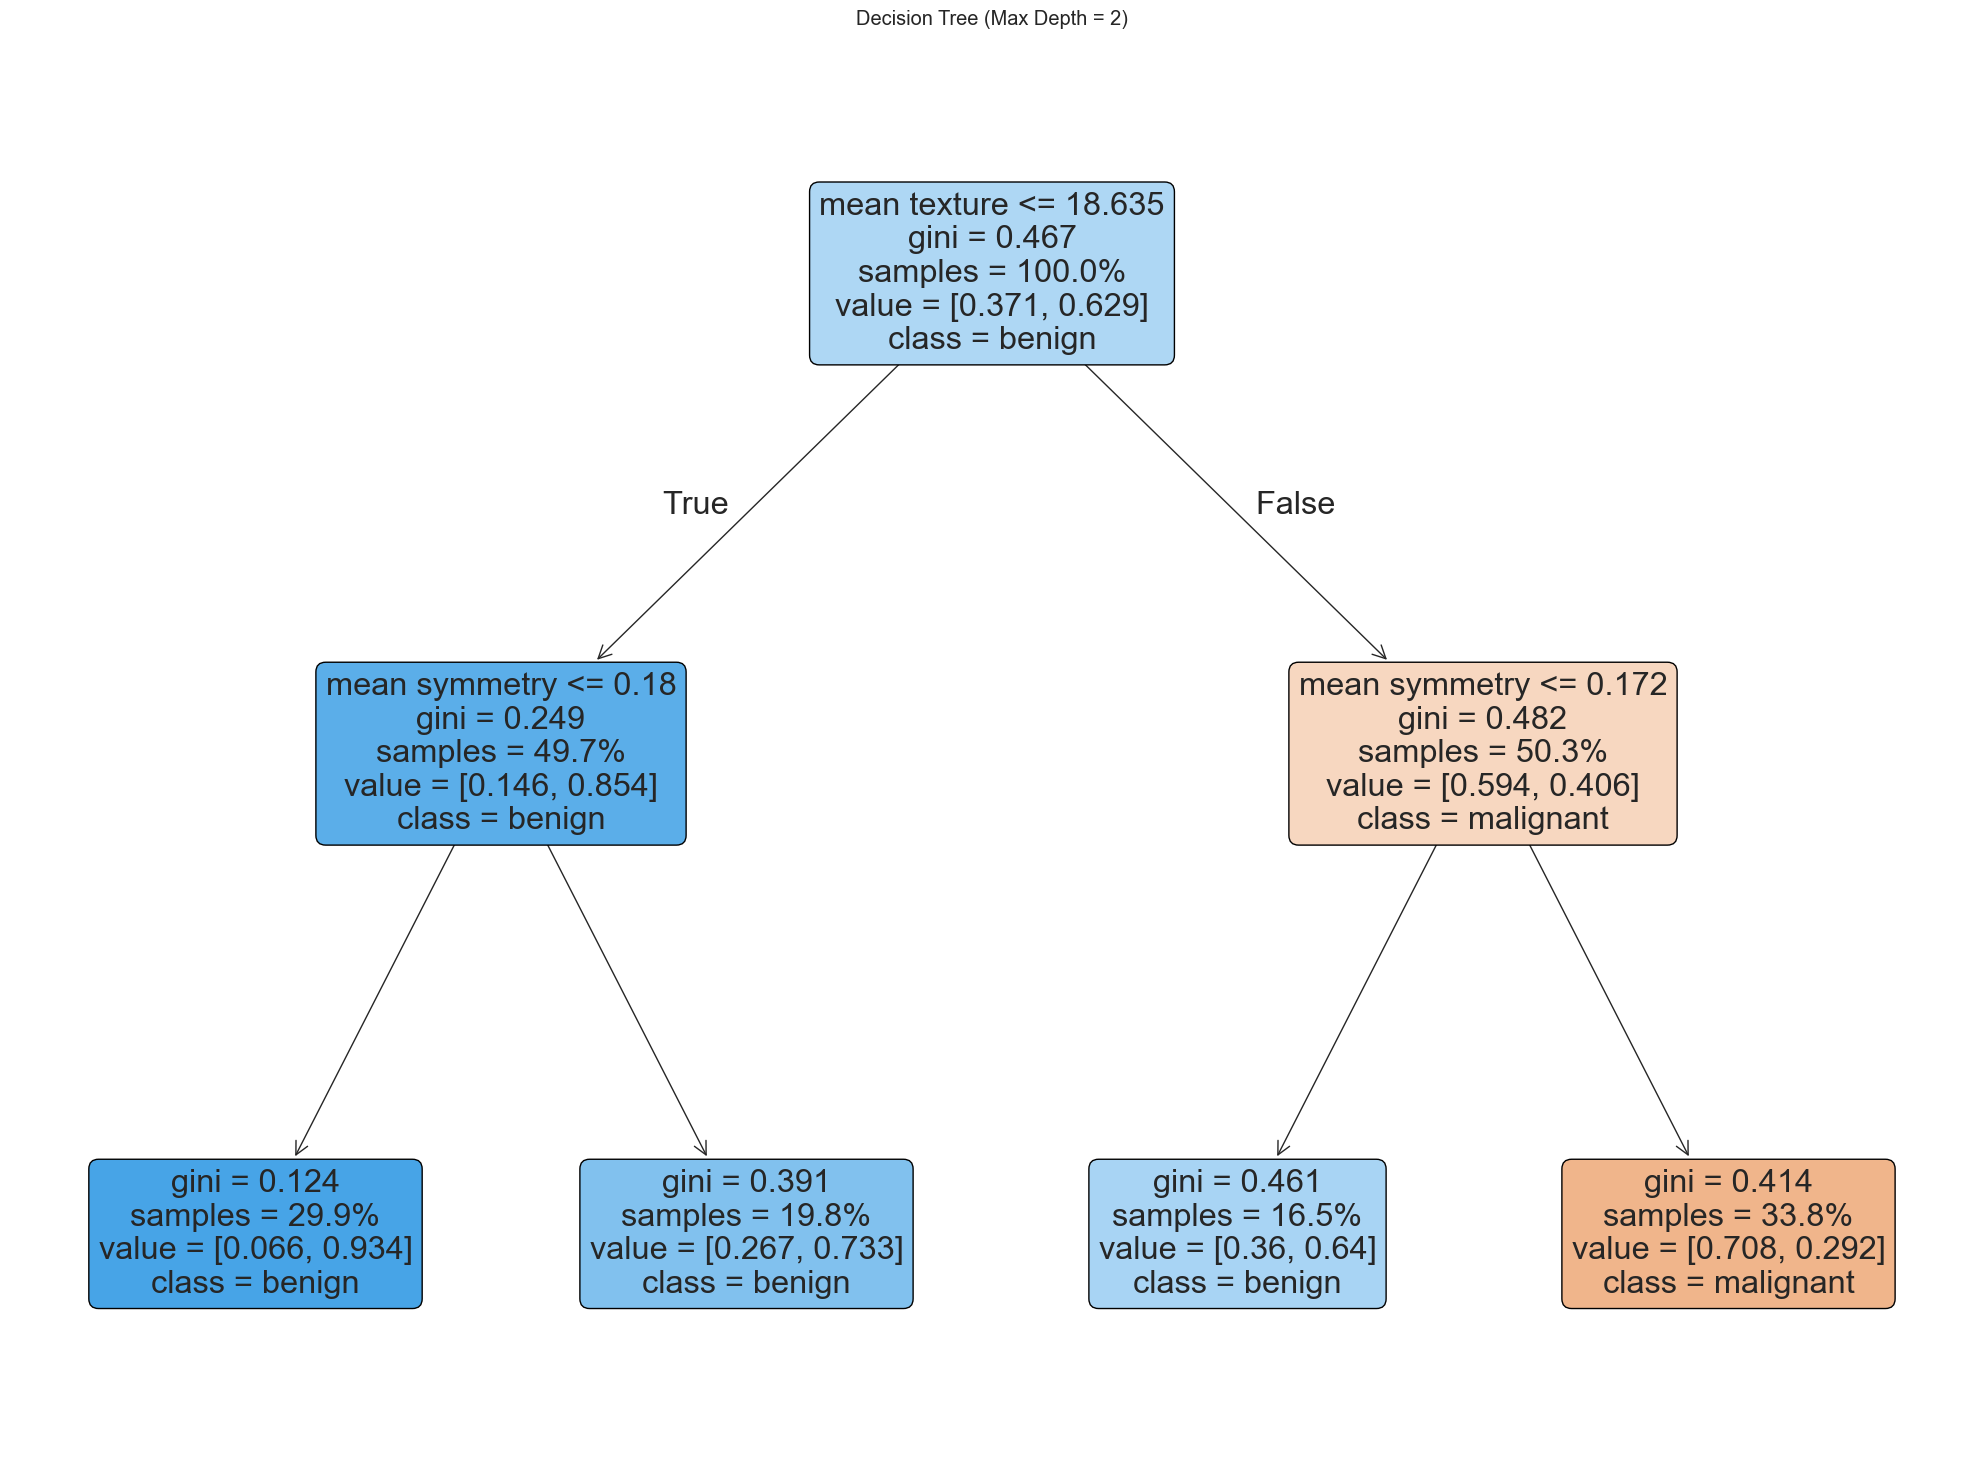

In [10]:
# Train the best model
best_model = DecisionTreeClassifier(max_depth=int(best_depth), random_state=42)
best_model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 15))
plot_tree(
    best_model, 
    feature_names=['mean texture', 'mean symmetry'], 
    class_names=data_breast_cancer.target_names, 
    filled=True,
    rounded=True,
    proportion=True
)
plt.title(f'Decision Tree (Max Depth = {int(best_depth)})')
plt.tight_layout()

# Save the figure
plt.savefig('./data/breast_cancer_tree.png', dpi=300, bbox_inches='tight')
plt.show()

Let's now visualize the decision boundaries of our trained model:

c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


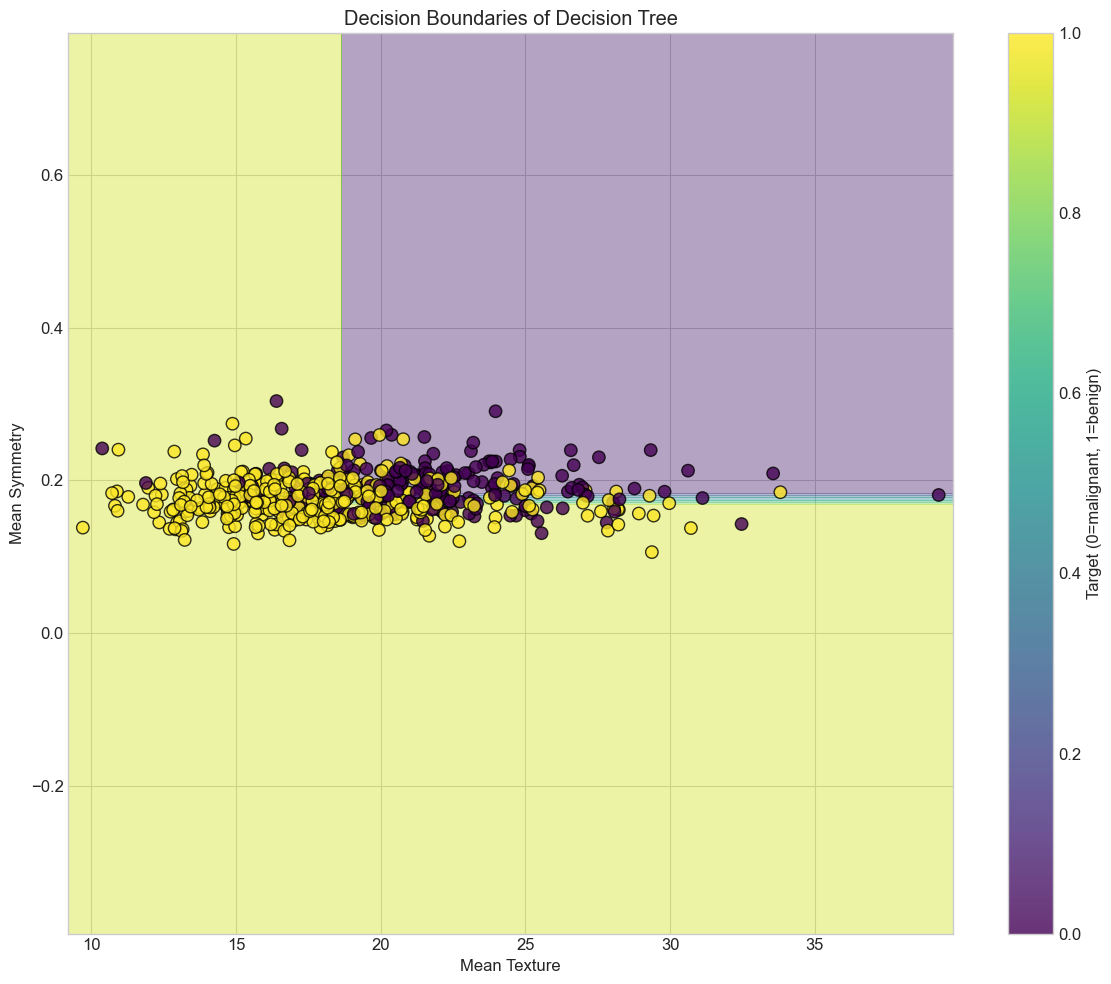

In [11]:
# Create a mesh grid to visualize decision boundaries
def plot_decision_boundaries(model, X, y, feature_names):
    # Get feature ranges
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    
    # Create meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict on mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(12, 10))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    
    # Plot original points
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=80, 
                edgecolors='k', cmap='viridis', alpha=0.8)
    
    plt.title('Decision Boundaries of Decision Tree')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.colorbar(scatter, label='Target (0=malignant, 1=benign)')
    plt.tight_layout()
    plt.savefig('./data/decision_boundaries.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot decision boundaries
plot_decision_boundaries(best_model, X, y, ['Mean Texture', 'Mean Symmetry'])

Classification Report:
              precision    recall  f1-score   support

   malignant       0.65      0.65      0.65        43
      benign       0.79      0.79      0.79        71

    accuracy                           0.74       114
   macro avg       0.72      0.72      0.72       114
weighted avg       0.74      0.74      0.74       114



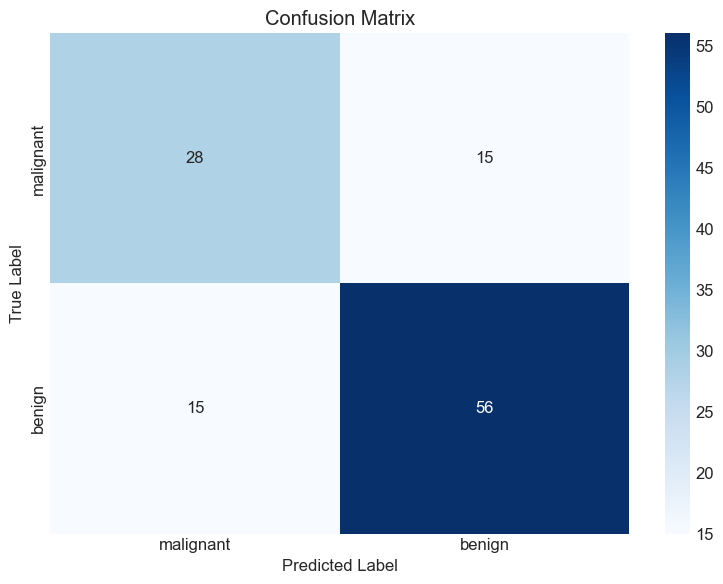

In [12]:
# Evaluate the best model
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data_breast_cancer.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data_breast_cancer.target_names,
            yticklabels=data_breast_cancer.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('./data/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Regression with Decision Trees <a name="regression"></a>

### 3.1 Polynomial Data Generation <a name="polynomial-data"></a>

Decision trees can also be used for regression tasks. Let's generate some polynomial data and use a decision tree to fit a regression model.

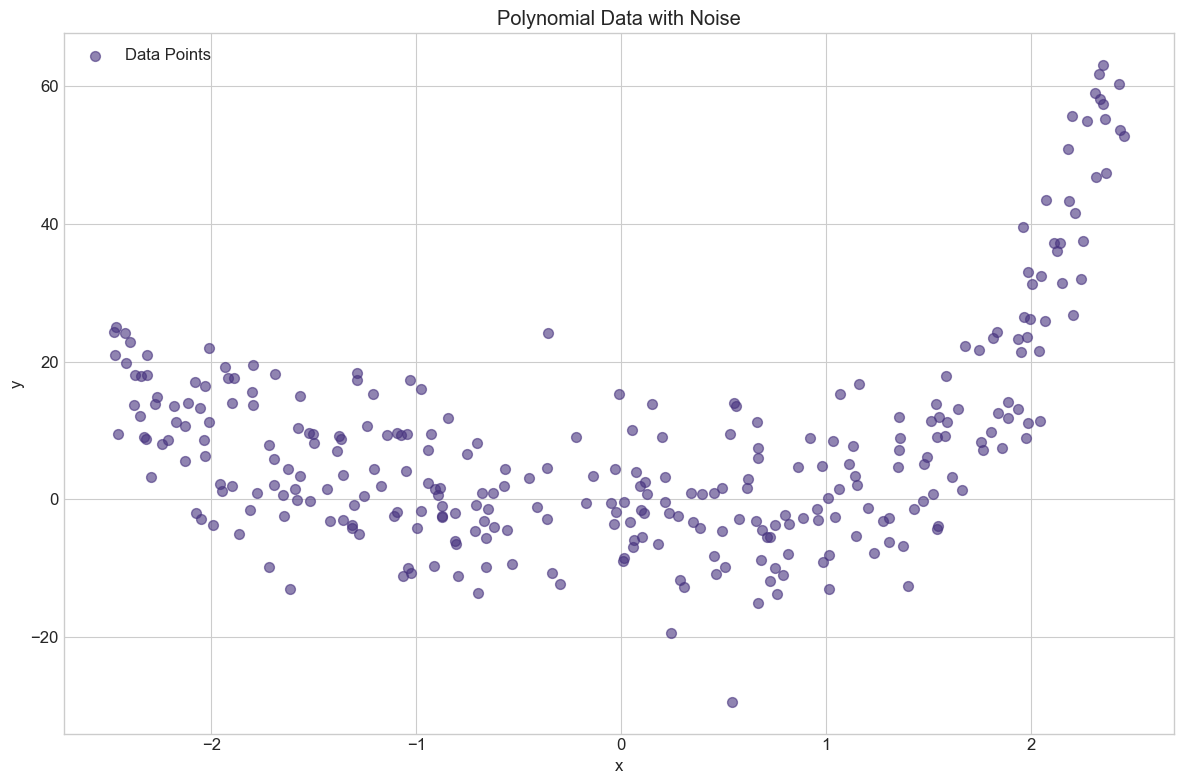

In [13]:
# Generate polynomial data
np.random.seed(42)  # For reproducibility
size = 300
X = np.random.rand(size) * 5 - 2.5  # Random values between -2.5 and 2.5

# Define polynomial coefficients
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2

# Generate target values with some noise
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size) * 8 - 4

# Create a dataframe
df = pd.DataFrame({'x': X, 'y': y})

# Plot the data
plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['y'], alpha=0.6, s=50, label='Data Points')
plt.title('Polynomial Data with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 3.2 Regression Model Training <a name="regression-training"></a>

Now, let's train decision tree regression models with different depths and evaluate their performance.

In [14]:
# Prepare the data
X_reg = df[['x']]
y_reg = df['y']

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Initialize list to store results
depths_reg = range(1, 15)  # Expanded range
results_reg = []

# Evaluate model performance at different depths
for depth in depths_reg:
    model_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model_reg.fit(X_train_reg, y_train_reg)
    
    # Compute performance metrics
    y_train_pred = model_reg.predict(X_train_reg)
    y_test_pred = model_reg.predict(X_test_reg)
    
    train_mse = mean_squared_error(y_train_reg, y_train_pred)
    test_mse = mean_squared_error(y_test_reg, y_test_pred)
    
    results_reg.append([depth, train_mse, test_mse])

# Convert results to DataFrame
results_reg_df = pd.DataFrame(
    results_reg, 
    columns=['Depth', 'Train MSE', 'Test MSE']
)

# Display results
results_reg_df

,Depth,Train MSE,Test MSE
0,1,111.791244,96.696250
1,2,89.846115,62.555634
2,3,68.863411,55.194535
3,4,60.818455,58.527180
4,5,52.609377,58.529600
5,6,46.928577,54.407237
6,7,39.899684,63.801433
7,8,31.469371,66.696532
8,9,27.340365,68.767476
9,10,22.117431,71.568102


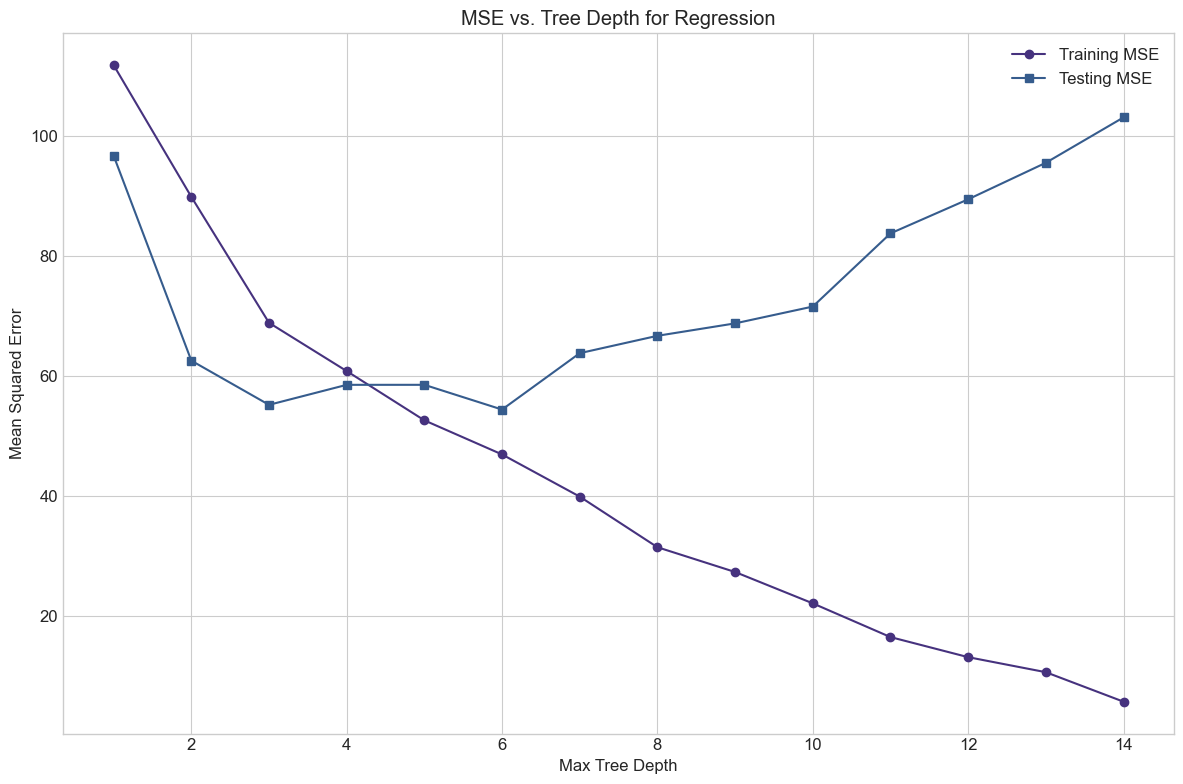

In [15]:
# Visualize MSE vs. tree depth
plt.figure(figsize=(12, 8))
plt.plot(results_reg_df['Depth'], results_reg_df['Train MSE'], marker='o', label='Training MSE')
plt.plot(results_reg_df['Depth'], results_reg_df['Test MSE'], marker='s', label='Testing MSE')
plt.xlabel('Max Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Tree Depth for Regression')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('./data/regression_mse_depth.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# Find optimal depth for regression
best_depth_reg_idx = results_reg_df['Test MSE'].idxmin()
best_depth_reg = results_reg_df.loc[best_depth_reg_idx, 'Depth']
best_metrics_reg = results_reg_df.loc[best_depth_reg_idx]

print(f"Optimal tree depth for regression: {int(best_depth_reg)}")
print(f"Best test MSE: {best_metrics_reg['Test MSE']:.4f}")

# Save the best results
best_results_reg = results_reg_df.loc[best_depth_reg_idx].tolist()

with open('./data/mse_tree.pkl', 'wb') as file_reg:
    pickle.dump(best_results_reg, file_reg)

Optimal tree depth for regression: 6
Best test MSE: 54.4072


### 3.3 Performance Visualization <a name="regression-visualization"></a>

Let's train the best regression model and visualize its predictions compared to the actual data.

c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


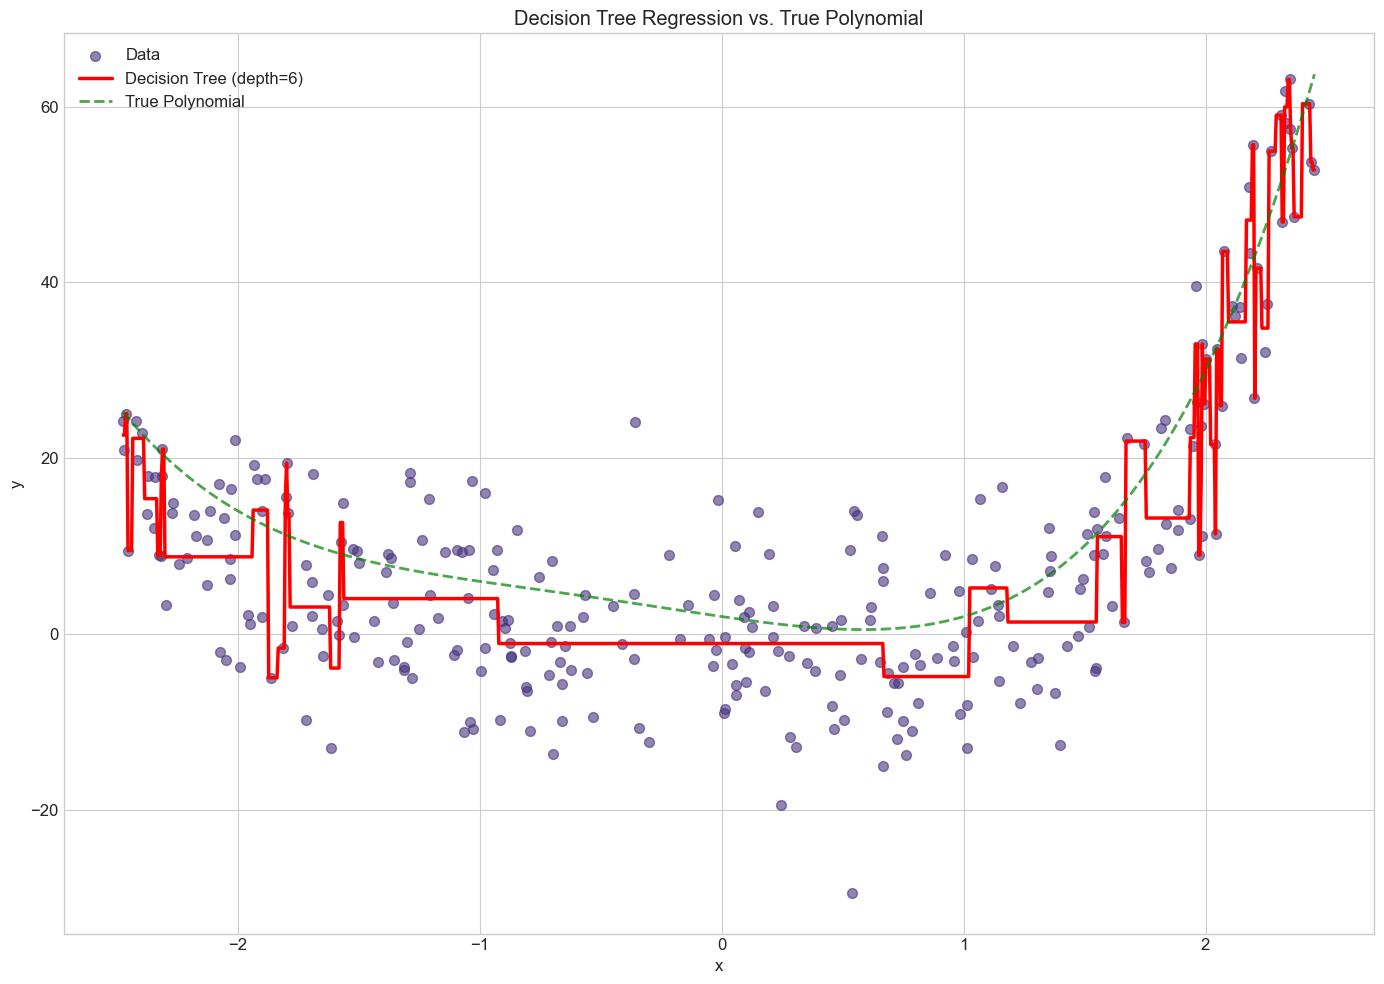

In [17]:
# Train the best regression model
best_model_reg = DecisionTreeRegressor(max_depth=int(best_depth_reg), random_state=42)
best_model_reg.fit(X_reg, y_reg)

# Create a dense grid of x values for smoother plotting
X_grid = np.linspace(X_reg['x'].min(), X_reg['x'].max(), 1000).reshape(-1, 1)
y_grid_pred = best_model_reg.predict(X_grid)

# Plot the data and regression line
plt.figure(figsize=(14, 10))
plt.scatter(X_reg, y_reg, alpha=0.6, s=50, label='Data')
plt.plot(X_grid, y_grid_pred, color='red', linewidth=2.5, label=f'Decision Tree (depth={int(best_depth_reg)})')

# For comparison, plot the true polynomial (without noise)
X_true = np.linspace(X_reg['x'].min(), X_reg['x'].max(), 1000)
y_true = w4*(X_true**4) + w3*(X_true**3) + w2*(X_true**2) + w1*X_true + w0
plt.plot(X_true, y_true, color='green', linestyle='--', alpha=0.7, linewidth=2, label='True Polynomial')

plt.title('Decision Tree Regression vs. True Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('./data/regression_fit.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Advanced Decision Tree Techniques <a name="advanced-techniques"></a>

### 4.1 Feature Importance <a name="feature-importance"></a>

Decision trees provide a measure of feature importance based on how much each feature contributes to reducing impurity across all splits.

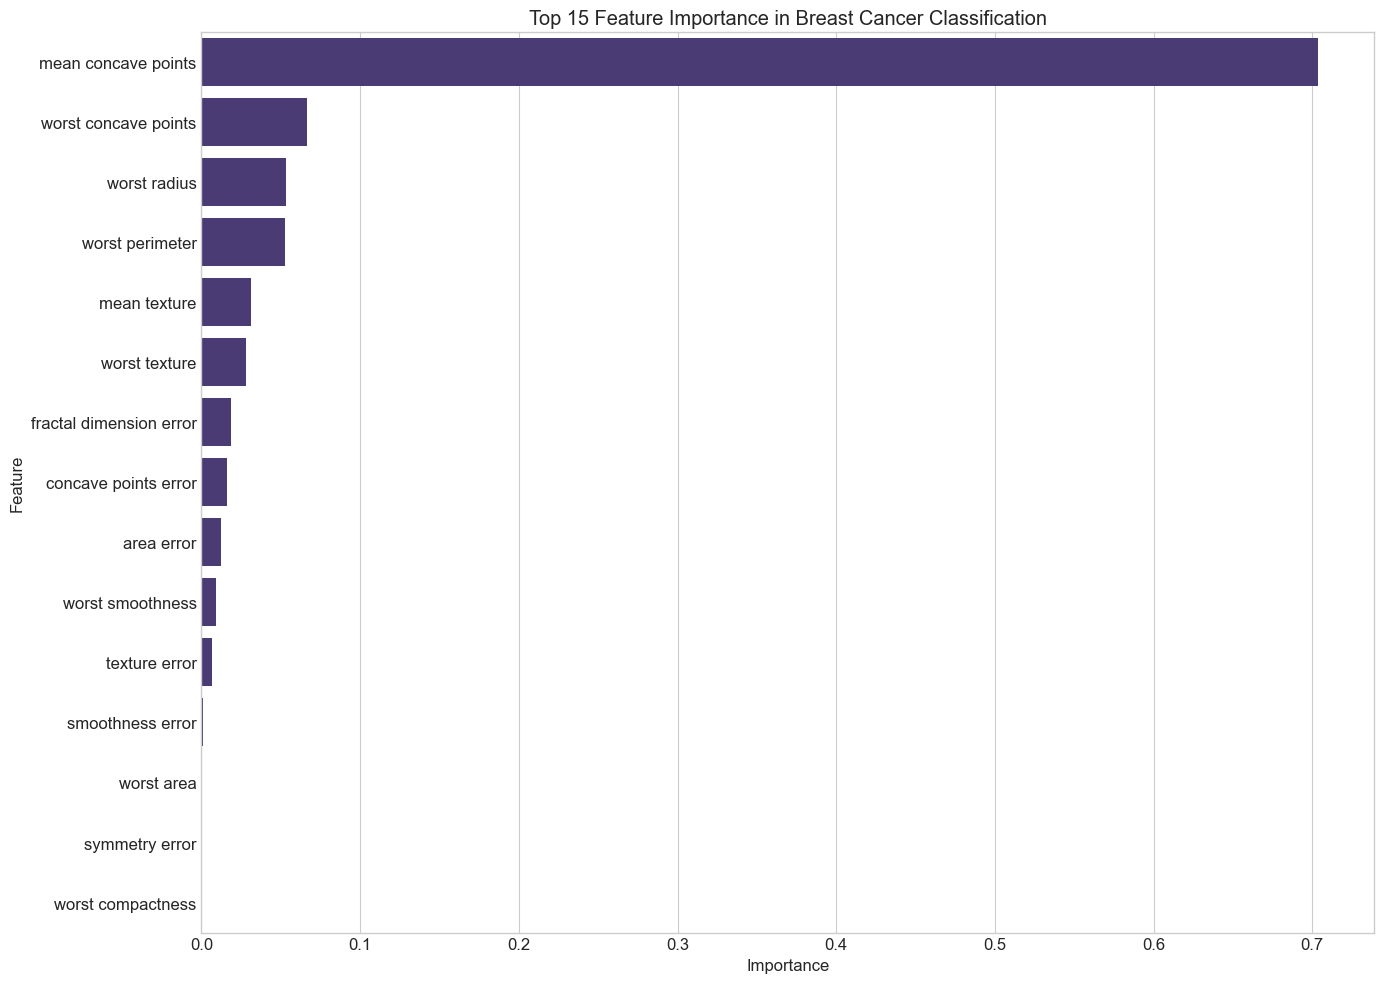

In [18]:
# Let's use all features from the breast cancer dataset for a more comprehensive analysis
X_all = data_breast_cancer.data
y = data_breast_cancer.target

# Split data
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

# Train a decision tree with all features
all_features_model = DecisionTreeClassifier(max_depth=5, random_state=42)
all_features_model.fit(X_all_train, y_all_train)

# Get feature importance
feature_importances = all_features_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_all.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importance in Breast Cancer Classification')
plt.tight_layout()
plt.savefig('./data/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.2 Pruning Strategies <a name="pruning"></a>

Pruning is a technique to reduce overfitting in decision trees. In scikit-learn, we can use techniques like `min_samples_split`, `min_samples_leaf`, and `max_depth` to control tree complexity.

In [19]:
# We'll compare different pruning parameters on the breast cancer dataset
pruning_params = [
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'label': 'No Pruning'},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'label': 'Max Depth=5'},
    {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1, 'label': 'Min Samples Split=10'},
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 10, 'label': 'Min Samples Leaf=10'},
    {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'label': 'Combined Pruning'}
]

# Create a results table
pruning_results = []

for params in pruning_params:
    model = DecisionTreeClassifier(
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        random_state=42
    )
    
    model.fit(X_all_train, y_all_train)
    
    # Count tree nodes and leaves
    n_nodes = model.tree_.node_count
    n_leaves = model.tree_.n_leaves
    
    # Calculate metrics
    train_acc = accuracy_score(y_all_train, model.predict(X_all_train))
    test_acc = accuracy_score(y_all_test, model.predict(X_all_test))
    
    pruning_results.append({
        'Strategy': params['label'],
        'Nodes': n_nodes,
        'Leaves': n_leaves,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc
    })

# Convert to DataFrame
pruning_df = pd.DataFrame(pruning_results)

# Display results
pruning_df

,Strategy,Nodes,Leaves,Training Accuracy,Testing Accuracy
0,No Pruning,31,16,1.000000,0.947368
1,Max Depth=5,25,13,0.995604,0.947368
2,Min Samples Split=10,27,14,0.995604,0.947368
3,Min Samples Leaf=10,19,10,0.958242,0.947368
4,Combined Pruning,23,12,0.978022,0.956140


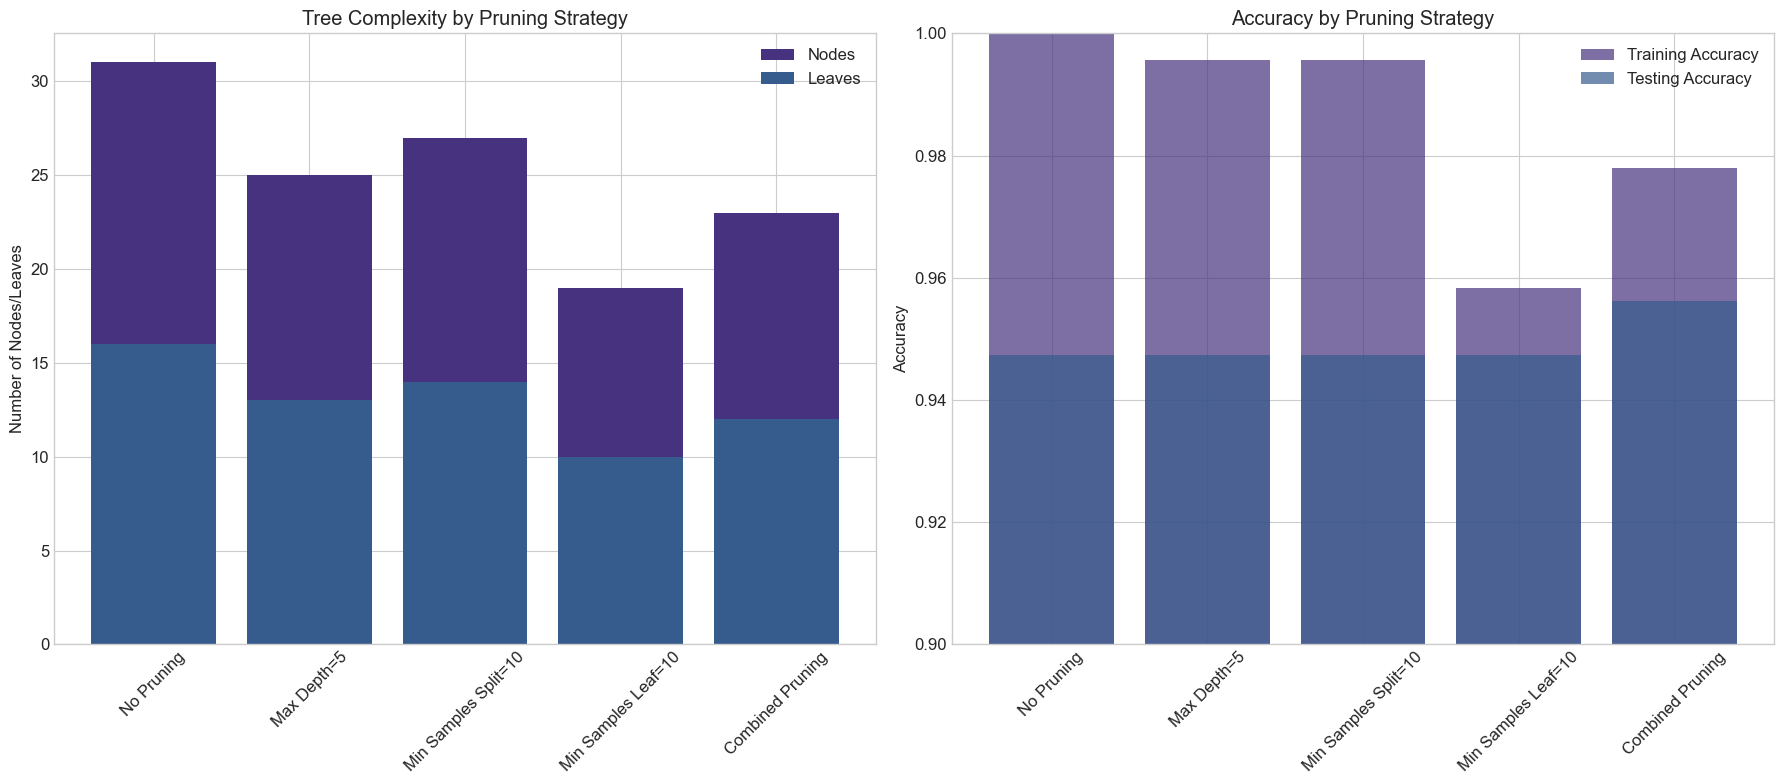

In [20]:
# Visualize the effect of pruning
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot tree size
ax[0].bar(pruning_df['Strategy'], pruning_df['Nodes'], label='Nodes')
ax[0].bar(pruning_df['Strategy'], pruning_df['Leaves'], label='Leaves')
ax[0].set_title('Tree Complexity by Pruning Strategy')
ax[0].set_ylabel('Number of Nodes/Leaves')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend()

# Plot accuracy
ax[1].bar(
    pruning_df['Strategy'], 
    pruning_df['Training Accuracy'], 
    label='Training Accuracy',
    alpha=0.7
)
ax[1].bar(
    pruning_df['Strategy'], 
    pruning_df['Testing Accuracy'], 
    label='Testing Accuracy',
    alpha=0.7
)
ax[1].set_title('Accuracy by Pruning Strategy')
ax[1].set_ylabel('Accuracy')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylim(0.9, 1.0)  # Adjust as needed
ax[1].legend()

plt.tight_layout()
plt.savefig('./data/pruning_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Handling Categorical Features <a name="categorical-features"></a>

Decision trees can handle categorical features by using one-hot encoding or by using specialized split criteria. Let's see how to handle categorical features with scikit-learn decision trees.

In [21]:
# Let's create a sample dataset with a categorical feature
np.random.seed(42)
n_samples = 300

# Create a numerical feature
age = np.random.normal(35, 10, n_samples).astype(int)

# Create a categorical feature (education level: 0-3)
education = np.random.choice([0, 1, 2, 3], size=n_samples, p=[0.2, 0.4, 0.3, 0.1])

# Create a target (income: 0 or 1)
# Higher education and age generally lead to higher income
income_prob = 0.2 + 0.1 * education + 0.01 * (age - 20) / 10
income_prob = np.clip(income_prob, 0, 0.9)
income = np.random.binomial(1, income_prob)

# Create a DataFrame
cat_df = pd.DataFrame({
    'Age': age,
    'Education': education,
    'Income': income
})

# Map education levels to labels for better interpretation
education_map = {0: 'High School', 1: 'Bachelor', 2: 'Master', 3: 'PhD'}
cat_df['Education_Label'] = cat_df['Education'].map(education_map)

cat_df.head()

,Age,Education,Income,Education_Label
0,39,1,0,Bachelor
1,33,0,0,High School
2,41,2,1,Master
3,50,2,0,Master
4,32,3,1,PhD


In [22]:
# Approach 1: Use one-hot encoding
cat_df_encoded = pd.get_dummies(cat_df[['Age', 'Education']], columns=['Education'], drop_first=True)
X_cat = cat_df_encoded
y_cat = cat_df['Income']

# Split data
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(
    X_cat, y_cat, test_size=0.2, random_state=42
)

# Train a decision tree
cat_model = DecisionTreeClassifier(max_depth=4, random_state=42)
cat_model.fit(X_cat_train, y_cat_train)

# Evaluate
y_cat_pred = cat_model.predict(X_cat_test)
cat_accuracy = accuracy_score(y_cat_test, y_cat_pred)

print(f"Accuracy with one-hot encoded categorical features: {cat_accuracy:.4f}")

Accuracy with one-hot encoded categorical features: 0.6500


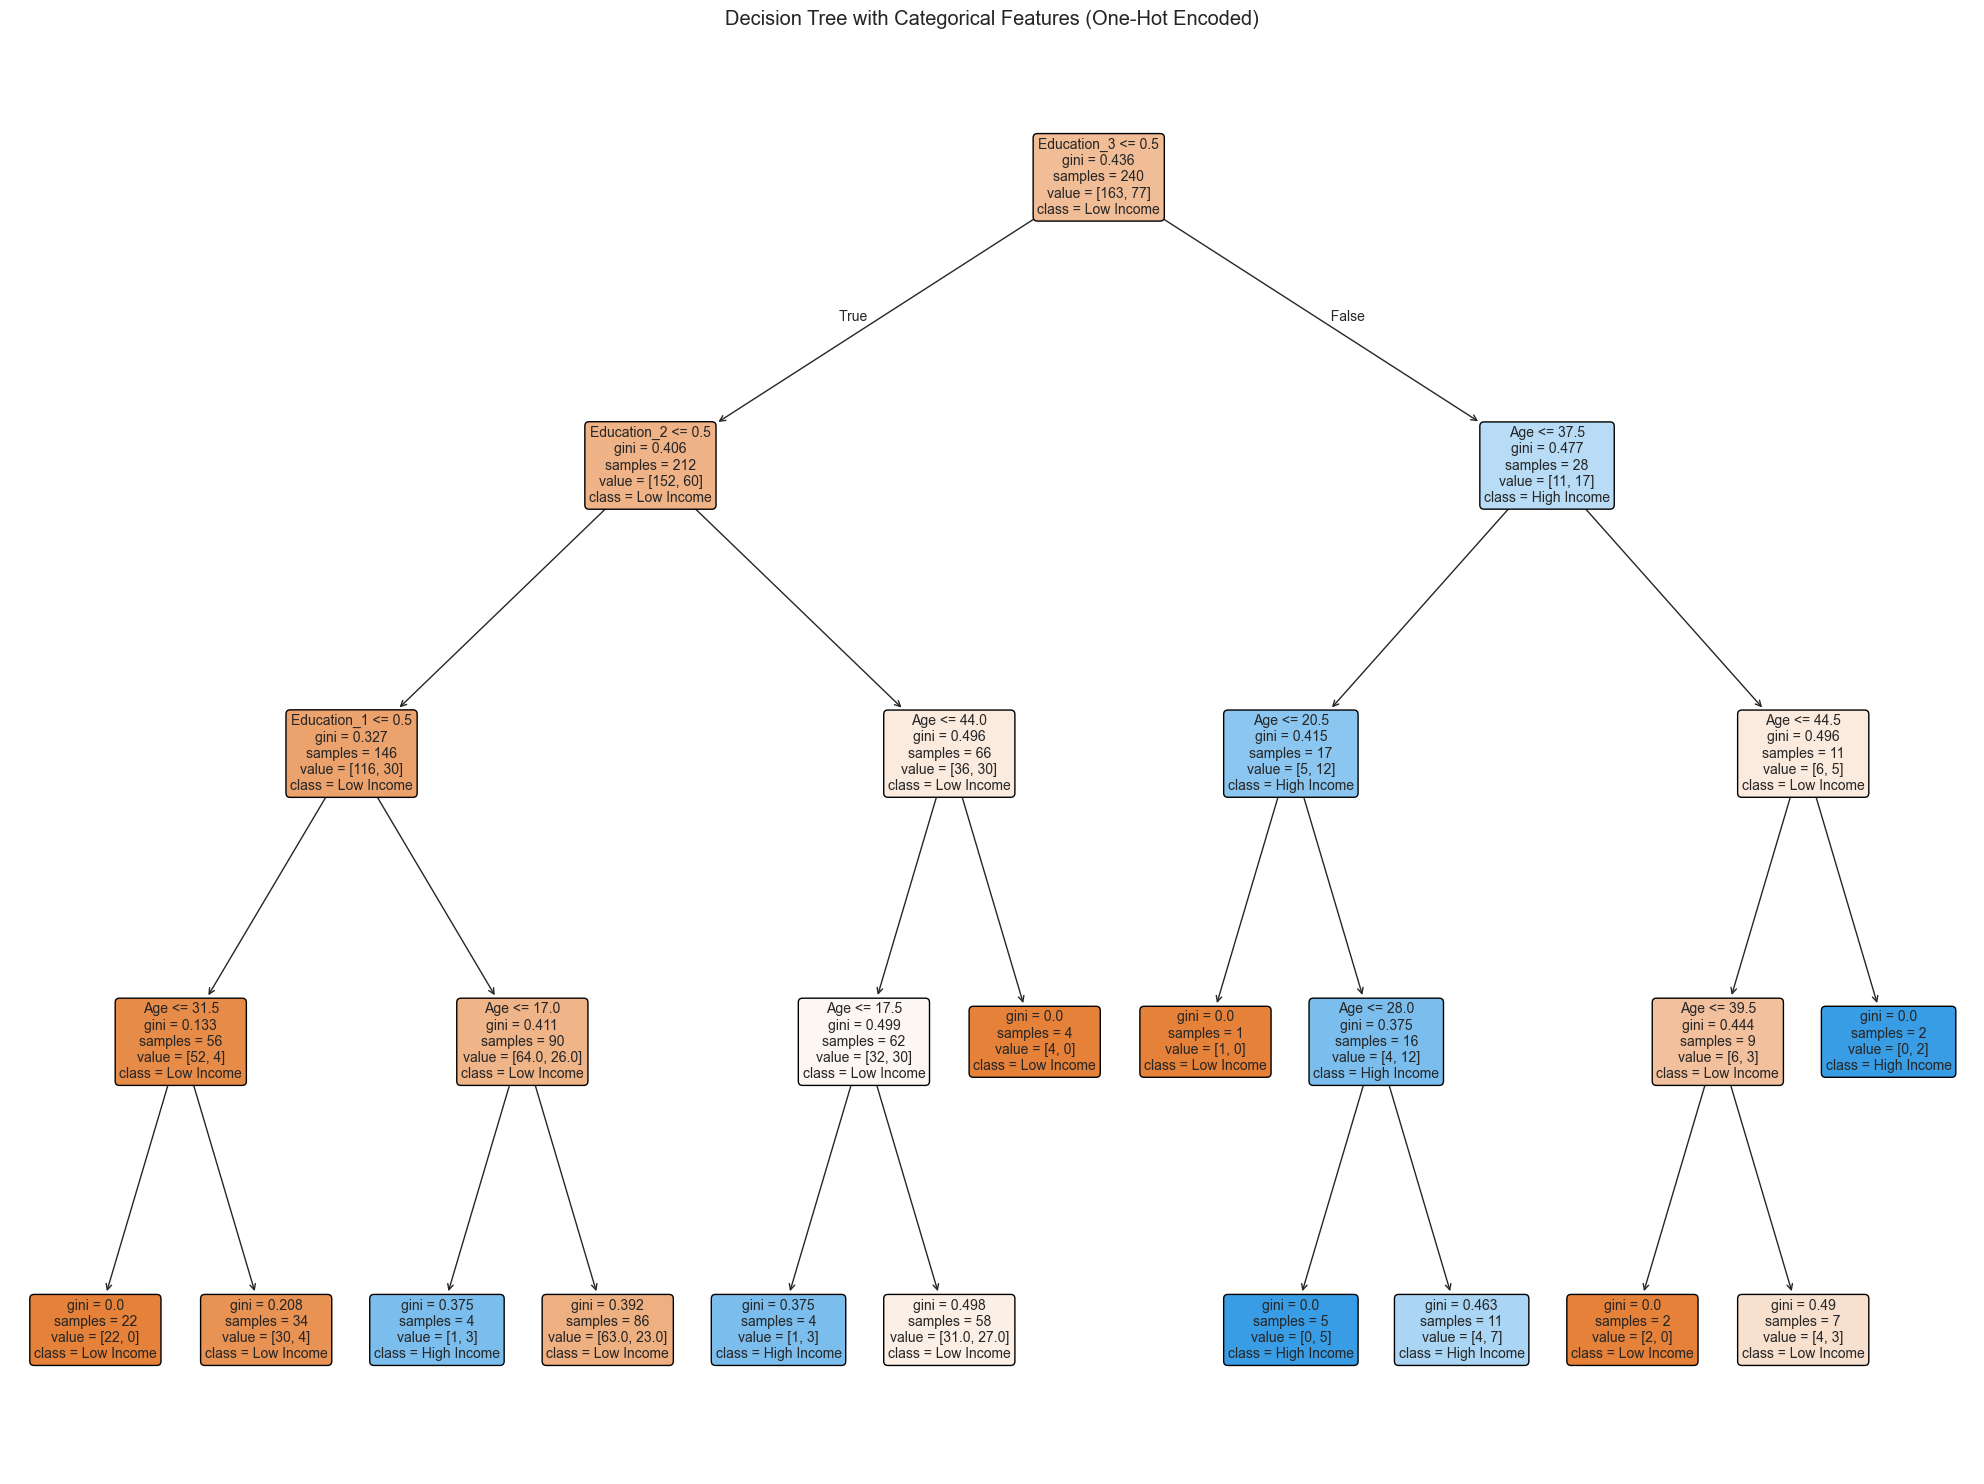

In [23]:
# Visualize the tree with categorical features
plt.figure(figsize=(20, 15))
plot_tree(
    cat_model,
    feature_names=X_cat.columns,
    class_names=['Low Income', 'High Income'],
    filled=True,
    rounded=True
)
plt.title('Decision Tree with Categorical Features (One-Hot Encoded)')
plt.savefig('./data/categorical_tree.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

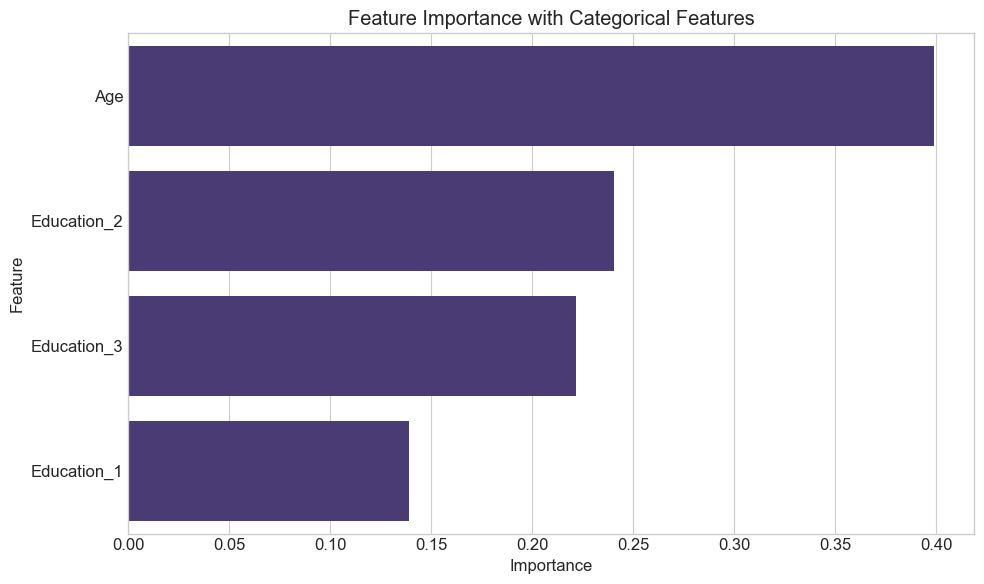

In [24]:
# Visualize feature importance for the categorical model
cat_importance = pd.DataFrame({
    'Feature': X_cat.columns,
    'Importance': cat_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=cat_importance)
plt.title('Feature Importance with Categorical Features')
plt.tight_layout()
plt.savefig('./data/categorical_importance.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Conclusion <a name="conclusion"></a>

In this notebook, we explored the application of decision trees for both classification and regression tasks. Key takeaways include:

1. **Classification with Decision Trees**:
   - We used the Breast Cancer Wisconsin dataset to classify tumors as malignant or benign.
   - We found the optimal tree depth by evaluating performance metrics across different depths.
   - We visualized the tree structure and decision boundaries to gain insights into how the model makes predictions.

2. **Regression with Decision Trees**:
   - We generated synthetic polynomial data with noise and used decision trees for regression.
   - We explored how tree depth affects the MSE and found the optimal depth for our data.
   - Decision trees were able to capture the non-linear patterns in the data.

3. **Advanced Techniques**:
   - We analyzed feature importance to identify the most predictive features.
   - We investigated various pruning strategies to control overfitting.
   - We demonstrated how to handle categorical features using one-hot encoding.

### Strengths of Decision Trees:

- Easy to understand and interpret
- Requires little data preprocessing (no normalization or scaling needed)
- Can handle both numerical and categorical data
- Can model non-linear relationships

### Limitations of Decision Trees:

- Can create overly complex trees that overfit the data
- Can be unstable, where small changes in the data can result in very different trees
- Biased toward features with more levels (for categorical variables)
- Not as accurate as more complex algorithms for many problems

Decision trees are often used as components in more powerful algorithms like Random Forests and Gradient Boosting, which we'll explore in future projects.